## Dimensionality Reduction

### Made By Luisa

In [16]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap

In [17]:
#To load UMAP run one of the following
# conda install -c conda-forge umap-learn
# pip install umap-learn


### Load Data

In [18]:
# don't want to use synthetic data for dimensionality reduction so re-do the split into training and test data 
df = pd.read_csv("final_df.csv")
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(df.drop('is_corona_positive', axis=1), df['is_corona_positive'], test_size=0.2, random_state=42)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled, X_test_scaled = scaler.transform(X_valid), scaler.transform(X_test)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns).reset_index(drop=True)
X_valid_df = pd.DataFrame(X_valid_scaled, columns=X_valid.columns).reset_index(drop=True)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns).reset_index(drop=True)

y_train_df = pd.DataFrame(y_train, columns=['is_corona_positive']).reset_index(drop=True)
y_valid_df = pd.DataFrame(y_valid, columns=['is_corona_positive']).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test, columns=['is_corona_positive']).reset_index(drop=True)


### PCA
PCA is an unsupervised dimensionality reduction technique that is linear in nature

In [19]:
# Fit PCA with 3 components
pca = PCA(n_components = 3)
principal_components = pca.fit_transform(X_train_df)
print("{:.1%}".format(sum(pca.explained_variance_ratio_)), 'variance of features explained by 3 Principal Components')

48.6% variance of features explained by 3 Principal Components


In [20]:
#less than half variation in dataset is explained by 3 principal components
# Look at loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3'],
                        index = X_train_df.columns )
loadings.sort_values('PC1').head(13)

,PC1,PC2,PC3
test_indication_Other,-0.515088,0.174365,0.128281
days_since_start,-0.181381,-0.597005,0.162556
age_60_and_above_NaN,-0.177324,-0.536267,0.211535
gender_male,0.007043,-0.163824,-0.008386
age_60_and_above_Yes,0.043402,0.284565,-0.133223
gender_NaN,0.056638,0.323140,-0.033000
shortness_of_breath,0.164517,0.093773,0.376689
sore_throat,0.186980,0.090814,0.481640
head_ache,0.204618,0.091113,0.502346
test_indication_Contact with confirmed,0.280404,0.023661,0.333308


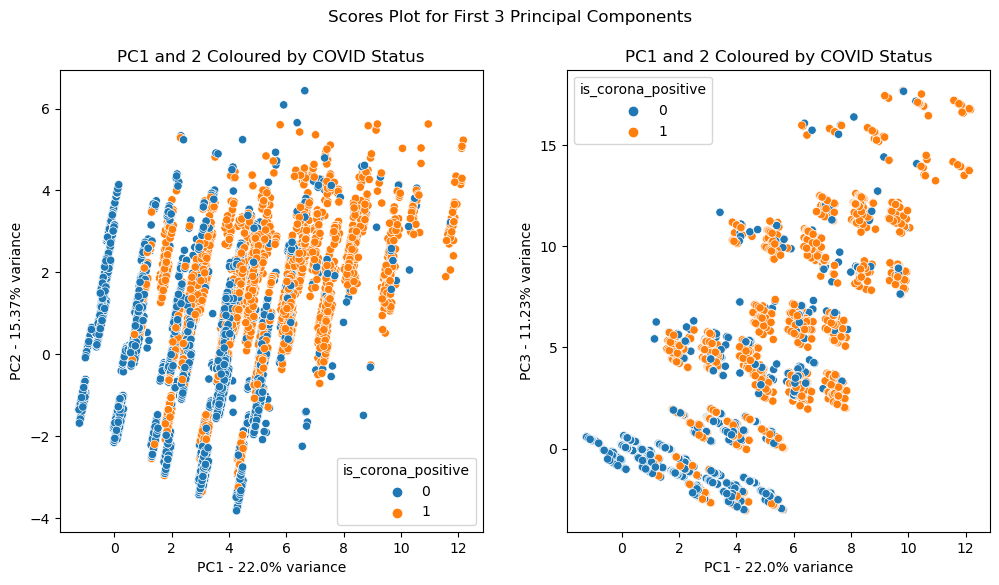

In [21]:
# Plot scores
fig, axes = plt.subplots(1,2, figsize = (12,6))

g = sns.scatterplot(x = principal_components[:,0], y =principal_components[:,1], hue = y_train_df['is_corona_positive'], ax = axes[0])

g.set(xlabel = 'PC1 - ' + str(round(pca.explained_variance_ratio_[0] *100, 2))  +'% variance',
         ylabel = 'PC2 - ' + str(round(pca.explained_variance_ratio_[1] *100, 2))  +'% variance',
         title = 'PC1 and 2 Coloured by COVID Status')

f = sns.scatterplot(x = principal_components[:,0], y =principal_components[:,2], ax = axes[1],hue = y_train_df['is_corona_positive'] )

f.set(xlabel = 'PC1 - ' + str(round(pca.explained_variance_ratio_[0] *100, 2))  +'% variance',
      ylabel =  'PC3 - ' + str(round(pca.explained_variance_ratio_[2] *100, 2))+'% variance',
      title = 'PC1 and 2 Coloured by COVID Status')
      
fig.suptitle('Scores Plot for First 3 Principal Components')
None

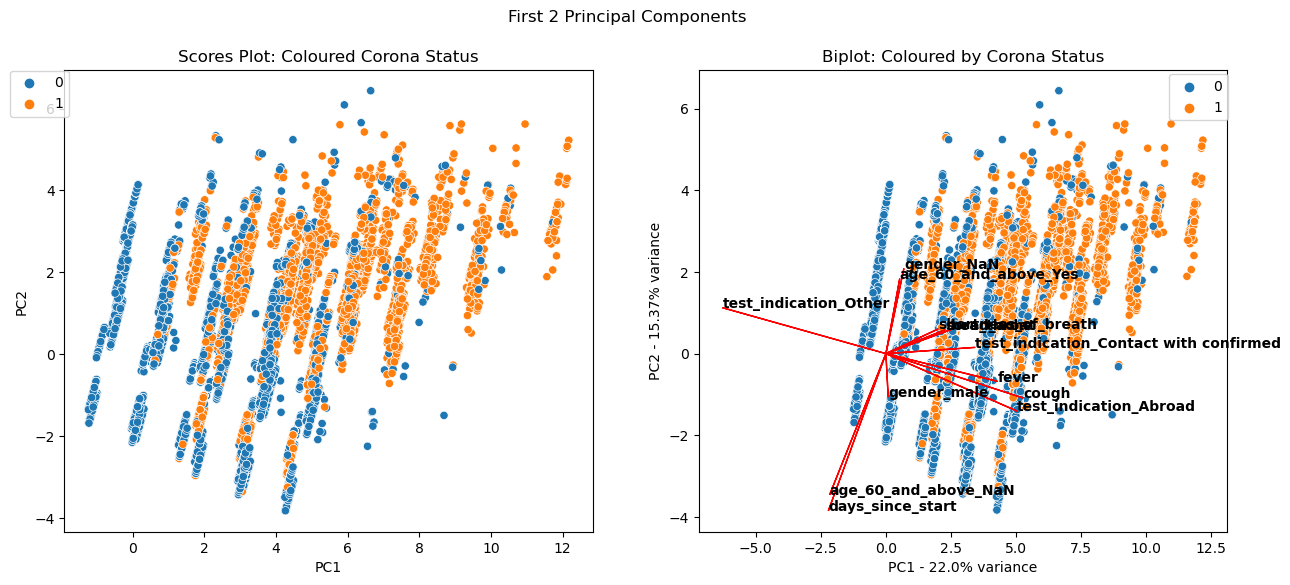

In [22]:
# Plot loadings
x_loading = loadings['PC1']
y_loading = loadings['PC2']
x_score = principal_components[:,0]
y_score = principal_components[:,1]
fig, axes = plt.subplots(1,2, figsize = (15,6))

g = sns.scatterplot(x = principal_components[:,0], y =principal_components[:,1], hue =  y_train_df['is_corona_positive'], ax = axes[0])
g.set(xlabel = 'PC1', ylabel = 'PC2',title = 'Scores Plot: Coloured Corona Status')
g.legend(bbox_to_anchor=(0.01, 1),borderaxespad=0.06)
f = sns.scatterplot(x = principal_components[:,0], y =principal_components[:,1], hue =  y_train_df['is_corona_positive'], ax = axes[1])
for i, varnames in enumerate(loadings.index):
    f.arrow(
        0, 0, # coordinates of arrow base
        x_loading[i] * max(x_score), # length of the arrow along x
        y_loading[i] * max(y_score), # length of the arrow along y
        color='r'
        )
    f.text(x_loading[i]* max(x_score), y_loading[i]* max(y_score), varnames, weight = 'bold')
f.set(xlabel = 'PC1 - ' + str(round(pca.explained_variance_ratio_[0] *100, 2))  +'% variance',
         ylabel = 'PC2 - ' + str(round(pca.explained_variance_ratio_[1] *100, 2))  +'% variance',
         title = 'Biplot: Coloured by Corona Status')
f.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0.3)
fig.suptitle('First 2 Principal Components')


None

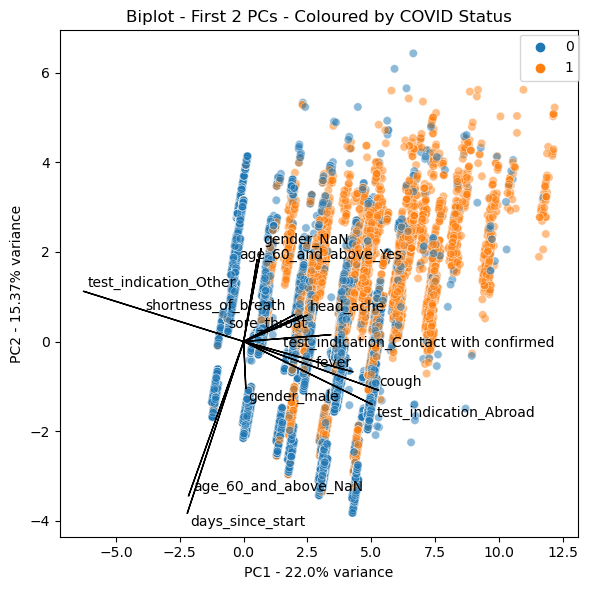

In [23]:
#Biplot
plt.figure(figsize = (6,6))
x_loading = loadings['PC1']
y_loading = loadings['PC2']
x_score = principal_components[:,0]
y_score = principal_components[:,1]
 
ax = sns.scatterplot(x = principal_components[:,0], y =principal_components[:,1], hue = y_train_df['is_corona_positive'], alpha = 0.5)
ax.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0.3)

texts = []
for i, varnames in enumerate(loadings.index):
    plt.arrow(
        0, 0, # coordinates of arrow base
        x_loading[i] * max(x_score), # length of the arrow along x
        y_loading[i] * max(y_score), # length of the arrow along y
        color='black'
        )
    texts.append(ax.annotate(varnames, xy=(x_loading[i]* max(x_score), y_loading[i]* max(y_score))))
    
adjust_text(texts)

plt.xlabel('PC1 - ' + str(round(pca.explained_variance_ratio_[0] *100, 2))  +'% variance')
plt.ylabel('PC2 - ' + str(round(pca.explained_variance_ratio_[1] *100, 2))  +'% variance')
plt.title('Biplot - First 2 PCs - Coloured by COVID Status')
plt.tight_layout()
plt.show()

### UMAP

umsupervised dimensionality reduction technique
https://umap-learn.readthedocs.io/en/latest/index.html

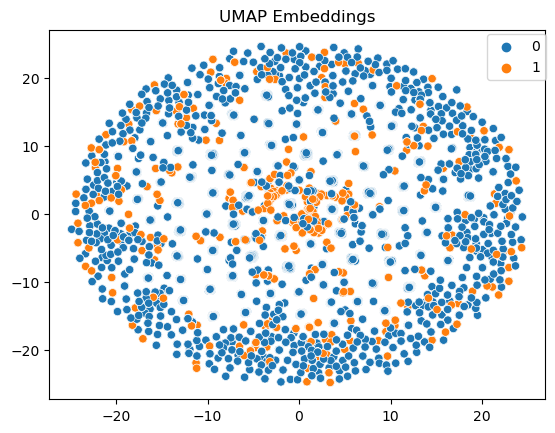

In [24]:
reducer = umap.UMAP(random_state=42)
embeddings = reducer.fit_transform(X_train_df)
g = sns.scatterplot(x = embeddings[:,0], y = embeddings[:,1], hue = y_train_df['is_corona_positive'])
g.set(title = 'UMAP Embeddings')
g.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0.3)
None

c:\Anaconda3\envs\la_data_science\lib\site-packages\scipy\sparse\_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


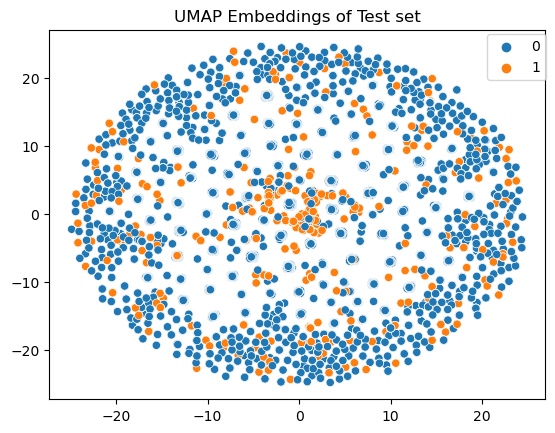

In [25]:
# embedd the test data set
test_embeddings = reducer.transform(X_test_df)
g = sns.scatterplot(x = test_embeddings[:,0], y = test_embeddings[:,1], hue = y_test_df['is_corona_positive'])
g.set(title = 'UMAP Embeddings of Test set')
g.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0.3)
None

### Supervised UMAP
Supervised dimensiona;ity technique
Then tranform the test data 

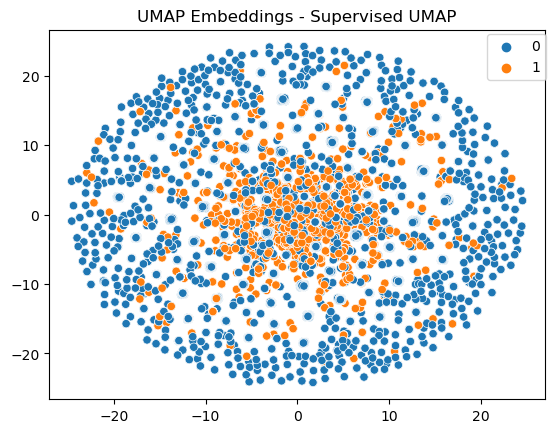

In [26]:
#Supervised UMAP
supervised_umap = umap.UMAP(random_state= 42).fit(X_train_df, y=y_train_df['is_corona_positive'])
embeddings_supervised = supervised_umap.transform(X_train_df)

g = sns.scatterplot(x = embeddings_supervised[:,0], y = embeddings_supervised[:,1], hue = y_train_df['is_corona_positive'])
g.set(title = 'UMAP Embeddings - Supervised UMAP')
g.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0.3)
None

c:\Anaconda3\envs\la_data_science\lib\site-packages\scipy\sparse\_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


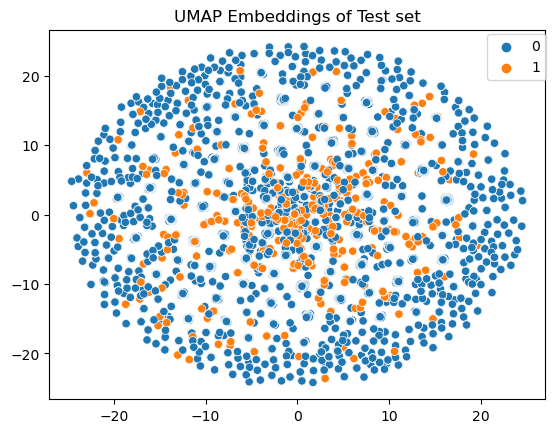

In [27]:
# embedd the test data set
test_embeddings_supervised = supervised_umap.transform(X_test_df)
g = sns.scatterplot(x = test_embeddings_supervised[:,0], y = test_embeddings_supervised[:,1], hue = y_test_df['is_corona_positive'])
g.set(title = 'UMAP Embeddings of Test set')
g.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0.3)
None